In [0]:
!wget http://cs231n.stanford.edu/tiny-imagenet-200.zip
!unzip tiny-imagenet-200.zip

In [0]:
from PIL import Image
from keras.preprocessing import image
import numpy as np
from sklearn.model_selection import train_test_split
cats_0 = ['n01443537','n01629819','n01641577','n01644900','n01698640','n01742172',
          'n01855672','n01882714','n02002724','n02056570','n02058221','n02074367',
          'n02085620','n02094433','n02099601','n02099712','n02106662','n02113799',
          'n02123045','n02123394','n02124075','n02125311','n02129165','n02132136',
          'n02364673','n02395406','n02403003','n02410509','n02415577','n02423022',
          'n02437312','n02480495','n02481823','n02486410','n02504458','n02509815']
cats_1 = ['n01770393','n01774384','n01774750','n01784675','n02165456','n02190166',
          'n02206856','n02226429','n02231487','n02233338','n02236044','n02268443',
          'n02279972','n02281406']

In [0]:
def read_cats(cats, lab):
  vecs = []
  labs = []
  for c in cats:
    for i in range(500):
      img = image.load_img("tiny-imagenet-200/train/"+c+"/images/"+c+"_"+str(i)+".JPEG")
      img_arr = image.img_to_array(img)
      img_arr = img_arr.flatten()
      img_arr = img_arr.reshape(64,64,3)
      vecs += [img_arr]
      labs += [lab]
  vecs = np.asarray(vecs)
  return(train_test_split(vecs,labs,
     train_size=.10,test_size=.20))

In [0]:
X0_train, X0_test, y0_train, y0_test = read_cats(cats_0, 0)
X1_train, X1_test, y1_train, y1_test = read_cats(cats_1, 1)
X_train = np.concatenate((X0_train, X1_train))
X_test = np.concatenate((X0_test, X1_test))
y_train = np.concatenate((y0_train, y1_train))
y_test = np.concatenate((y0_test, y1_test))

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
input_shape = (64, 64, 3)
#Instantiate an empty model
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=input_shape, padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 256)      

In [16]:
model.fit(X_train,y_train, validation_data=(X_test,y_test))

Train on 2500 samples, validate on 5000 samples
Epoch 1/1
2500/2500 [==============================] - 340s 136ms/step - loss: 0.2780 - accuracy: 0.7176 - val_loss: 0.2800 - val_accuracy: 0.7200


1


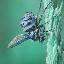

In [17]:
import random
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
i = random.randint(0,len(y_test)-1)

print(y_test[i])
img_arr = X_test[i]
img_arr = preprocess_input(img_arr)
img = image.array_to_img(img_arr)
img

In [0]:
# change read_cats to get balanced examples
def read_cats(cats, lab):
  vecs = []
  labs = []
  for c in cats:
    for i in range(500):
      img = image.load_img("tiny-imagenet-200/train/"+c+"/images/"+c+"_"+str(i)+".JPEG")
      img_arr = image.img_to_array(img)
      img_arr = img_arr.flatten()
      img_arr = img_arr.reshape(64,64,3)
      vecs += [img_arr]
      labs += [lab]
  vecs = np.asarray(vecs)
  return(train_test_split(vecs,labs,train_size=500,test_size=500))

In [21]:
# running again
X0_train, X0_test, y0_train, y0_test = read_cats(cats_0, 0)
X1_train, X1_test, y1_train, y1_test = read_cats(cats_1, 1)
X_train = np.concatenate((X0_train, X1_train))
X_test = np.concatenate((X0_test, X1_test))
y_train = np.concatenate((y0_train, y1_train))
y_test = np.concatenate((y0_test, y1_test))

model.fit(X_train,y_train, validation_data=(X_test,y_test))

Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 115s 115ms/step - loss: 0.5000 - accuracy: 0.5000 - val_loss: 0.5000 - val_accuracy: 0.5000


In [0]:
# change read_cats to get a very small set of examples

def read_cats(cats, lab):
  vecs = []
  labs = []
  for c in cats:
    for i in range(500):
      img = image.load_img("tiny-imagenet-200/train/"+c+"/images/"+c+"_"+str(i)+".JPEG")
      img_arr = image.img_to_array(img)
      img_arr = img_arr.flatten()
      img_arr = img_arr.reshape(64,64,3)
      vecs += [img_arr]
      labs += [lab]
  vecs = np.asarray(vecs)
  return(train_test_split(vecs,labs,train_size=5,test_size=500))


In [23]:
# running again
X0_train, X0_test, y0_train, y0_test = read_cats(cats_0, 0)
X1_train, X1_test, y1_train, y1_test = read_cats(cats_1, 1)
X_train = np.concatenate((X0_train, X1_train))
X_test = np.concatenate((X0_test, X1_test))
y_train = np.concatenate((y0_train, y1_train))
y_test = np.concatenate((y0_test, y1_test))

model.fit(X_train,y_train, validation_data=(X_test,y_test))

Train on 10 samples, validate on 1000 samples
Epoch 1/1
10/10 [==============================] - 22s 2s/step - loss: 0.5000 - accuracy: 0.5000 - val_loss: 0.5000 - val_accuracy: 0.5000


In [24]:
model.fit(X_train,y_train,epochs=1000,verbose=False)

In [0]:
# dang it... no percentage listed.

In [0]:
model.get_weights()

In [0]:
# Redefine read_cats to preprocess inputs
def read_cats(cats, lab):
  vecs = []
  labs = []
  for c in cats:
    for i in range(500):
      img = image.load_img("tiny-imagenet-200/train/"+c+"/images/"+c+"_"+str(i)+".JPEG")
      img_arr = image.img_to_array(img)
      img_arr = preprocess_input(img_arr)
      img_arr = img_arr.flatten()
      img_arr = img_arr.reshape(64,64,3)
      vecs += [img_arr]
      labs += [lab]
  vecs = np.asarray(vecs)
  return(train_test_split(vecs,labs,train_size=5,test_size=500))

In [27]:
# running again
X0_train, X0_test, y0_train, y0_test = read_cats(cats_0, 0)
X1_train, X1_test, y1_train, y1_test = read_cats(cats_1, 1)
X_train = np.concatenate((X0_train, X1_train))
X_test = np.concatenate((X0_test, X1_test))
y_train = np.concatenate((y0_train, y1_train))
y_test = np.concatenate((y0_test, y1_test))

model.fit(X_train,y_train,epochs=1000,verbose=False)

Train on 10 samples, validate on 1000 samples
Epoch 1/1
10/10 [==============================] - 22s 2s/step - loss: 0.5000 - accuracy: 0.5000 - val_loss: 0.5000 - val_accuracy: 0.5000


In [28]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [0]:
X0_train, X0_test, y0_train, y0_test = read_cats(cats_0, 0)
X1_train, X1_test, y1_train, y1_test = read_cats(cats_1, 1)
X_train = np.concatenate((X0_train, X1_train))
X_test = np.concatenate((X0_test, X1_test))
y_train = np.concatenate((y0_train, y1_train))
y_test = np.concatenate((y0_test, y1_test))
# Reshuffle training data
X_first, X_second, y_first, y_second = train_test_split(X_train,y_train,train_size=0.5)
X_train = np.concatenate((X_first, X_second))
y_train = np.concatenate((y_first, y_second))

In [31]:
model.fit(X_train,y_train,epochs=1000,verbose=False)

In [1]:
!wget http://cs231n.stanford.edu/tiny-imagenet-200.zip

--2020-05-14 11:38:00--  http://cs231n.stanford.edu/tiny-imagenet-200.zip
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.68.10
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248100043 (237M) [application/zip]
Saving to: ‘tiny-imagenet-200.zip’

tiny-imagenet-200.z 100%[===================>] 236.61M  40.6MB/s    in 9.6s    

2020-05-14 11:38:10 (24.6 MB/s) - ‘tiny-imagenet-200.zip’ saved [248100043/248100043]



In [2]:
!unzip tiny-imagenet-200.zip

Streaming output truncated to the last 5000 lines.
  inflating: tiny-imagenet-200/val/images/val_3963.JPEG  
  inflating: tiny-imagenet-200/val/images/val_7199.JPEG  
  inflating: tiny-imagenet-200/val/images/val_2752.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9687.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9407.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3603.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3412.JPEG  
  inflating: tiny-imagenet-200/val/images/val_6982.JPEG  
  inflating: tiny-imagenet-200/val/images/val_8496.JPEG  
  inflating: tiny-imagenet-200/val/images/val_7332.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9241.JPEG  
  inflating: tiny-imagenet-200/val/images/val_4196.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5980.JPEG  
  inflating: tiny-imagenet-200/val/images/val_6697.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9969.JPEG  
  inflating: tiny-imagenet-200/val/images/val_1598.JPEG  
  inflating: tiny-ima

In [0]:
from PIL import Image
from keras.preprocessing import image

import numpy as np
from sklearn.model_selection import train_test_split

In [0]:
cats_0 = ['n01443537','n01629819','n01641577','n01644900','n01698640','n01742172',
        'n01855672','n01882714','n02002724','n02056570','n02058221','n02074367',
        'n02085620','n02094433','n02099601','n02099712','n02106662','n02113799',
        'n02123045','n02123394','n02124075','n02125311','n02129165','n02132136',
        'n02364673','n02395406','n02403003','n02410509','n02415577','n02423022',
        'n02437312','n02480495','n02481823','n02486410','n02504458','n02509815']
cats_1 = ['n01770393','n01774384','n01774750','n01784675','n02165456','n02190166',
          'n02206856','n02226429','n02231487','n02233338','n02236044','n02268443',
          'n02279972','n02281406']

In [0]:
def read_cats(cats, lab):
#  vecs = np.array([])
  vecs = []
  labs = []
  for c in cats:
    for i in range(500):
      img = image.load_img("tiny-imagenet-200/train/"+c+"/images/"+c+"_"+str(i)+".JPEG")
      img_arr = image.img_to_array(img)
      img_arr = img_arr.flatten()
      vecs += [img_arr]
      labs += [lab]
  vecs = np.asarray(vecs)
  return(train_test_split(vecs,labs,train_size=5000,test_size=1000))

In [0]:
X0_train, X0_test, y0_train, y0_test = read_cats(cats_0, 0)
X1_train, X1_test, y1_train, y1_test = read_cats(cats_1, 1)
X_train = np.concatenate((X0_train, X1_train))
X_test = np.concatenate((X0_test, X1_test))
y_train = np.concatenate((y0_train, y1_train))
y_test = np.concatenate((y0_test, y1_test))

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
input_shape = (64, 64, 3)
#Instantiate an empty model
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=input_shape, padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 256)      

In [11]:
model.fit(X_train,y_train, validation_data=(X_test,y_test))

ValueError: ignored

In [0]:
vecs = []
labs = []
print("animals")
for c in cats_0:
  for i in range(500):
    img = image.load_img("tiny-imagenet-200/train/"+c+"/images/"+c+"_"+str(i)+".JPEG")
    img_arr = np.expand_dims(image.img_to_array(img), axis=0)
    x = img_arr.flatten()
    vecs += [x]
#    labs += [[1,0]]
    labs += [0]
print("bugs")
for c in cats_1:
  for i in range(500):
    img = image.load_img("tiny-imagenet-200/train/"+c+"/images/"+c+"_"+str(i)+".JPEG")
    img_arr = np.expand_dims(image.img_to_array(img), axis=0)
    x = img_arr.flatten()
    vecs += [x]
#    labs += [[0,1]]
    labs += [1]

animals
bugs


In [0]:
for v in vecs:
  

In [0]:
len(X_test[0][0])

64

In [0]:
X_train, X_test, y_train, y_test = train_test_split(vecs,labs,train_size=500,test_size=500)


In [0]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=[100,100], max_iter = 1000, activation = 'identity', verbose=True)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

# from keras.applications.vgg16 import preprocess_input

# len(img)
# img = image.load_img('fox1.jpeg', target_size=(224,224)) #note the input size
# img_arr = np.expand_dims(image.img_to_array(img), axis=0)
# x = preprocess_input(img_arr)
# print(img_arr)
# print(x)
# len(img_arr[0][0][0])

cats_0 = ['n01443537','n01629819','n01641577','n01644900','n01698640','n01742172',
        'n01855672','n01882714','n02002724','n02056570','n02058221','n02074367',
        'n02085620','n02094433','n02099601','n02099712','n02106662','n02113799',
        'n02123045','n02123394','n02124075','n02125311','n02129165','n02132136',
        'n02364673','n02395406','n02403003','n02410509','n02415577','n02423022',
        'n02437312','n02480495','n02481823','n02486410','n02504458','n02509815']
cats_1 = ['n01770393','n01774384','n01774750','n01784675','n02165456','n02190166',
          'n02206856','n02226429','n02231487','n02233338','n02236044','n02268443',
          'n02279972','n02281406']
cats_2 = ['n01768244','n01910747','n01917289','n01944390','n01945685','n01950731',
          'n01983481','n01984695','n02321529']



animals
5000
bugs
5000


In [0]:
# X_train = X0_train + X1_train
X_train = np.concatenate((X0_train, X1_train))
X_train.shape
len(X_train)
#X0_train[0,0,0,0]
#X1_train[0,0,0,0]
# X_train[0,0,0,0]

500

In [0]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=[1000,100], max_iter = 1000, activation = 'logistic', verbose=True, learning_rate='adaptive', learning_rate_init=0.00001)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

# Iteration 389, loss = 0.42269645
# Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
# 0.648

Iteration 1, loss = 0.69492216
Iteration 2, loss = 0.68078656
Iteration 3, loss = 0.67630502
Iteration 4, loss = 0.67258213
Iteration 5, loss = 0.66879691
Iteration 6, loss = 0.66542363
Iteration 7, loss = 0.66294708
Iteration 8, loss = 0.66062126
Iteration 9, loss = 0.65795750
Iteration 10, loss = 0.65626430
Iteration 11, loss = 0.65430674
Iteration 12, loss = 0.65303202
Iteration 13, loss = 0.65149136
Iteration 14, loss = 0.65005766
Iteration 15, loss = 0.64898887
Iteration 16, loss = 0.64819910
Iteration 17, loss = 0.64813616
Iteration 18, loss = 0.64699441
Iteration 19, loss = 0.64620787
Iteration 20, loss = 0.64558807
Iteration 21, loss = 0.64557483
Iteration 22, loss = 0.64324430
Iteration 23, loss = 0.64422747
Iteration 24, loss = 0.64351706
Iteration 25, loss = 0.64245552
Iteration 26, loss = 0.64183114
Iteration 27, loss = 0.64186706
Iteration 28, loss = 0.64087382
Iteration 29, loss = 0.64075912
Iteration 30, loss = 0.64140204
Iteration 31, loss = 0.64124106
Iteration 32, los

In [0]:
pred = clf.predict(X_train)

In [0]:
sum([pred[i] == y_train[i] for i in range(len(pred))])/len(pred)

0.997

In [0]:
len(y_train)

100

In [0]:
pred = clf.predict(X_test)

In [0]:
counts = [0,0,0,0]
for i in range(len(y_test)):
  counts[y_test[i]*2+int(pred[i])] += 1
counts

# [137, 113, 101, 149]
# really an animal, judged to be an animal
# really an animal, judged to be a bug
# really a bug, judged to be an animal
# really a bug, judged to be a bug

[328, 672, 235, 765]

In [0]:
pred[i][0]

0.0

0
[1.]


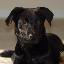

In [0]:
import random
import matplotlib.pyplot as plt


i = random.randint(0,len(pred)-1)

print(y_test[i])
print(pred[i])

img_arr = np.array(X_test[i]).reshape(64,64,3)
# plt.imshow(img, cmap='gray', vmin=-0.1, vmax=0.1)
#plt.imshow(img)
#plt.show()
# Image.fromarray(img,'RGB')
#len(img)
img = image.array_to_img(img_arr)
img

#len(X_test[i])
#display(X_test[i])

# img[32][32]

In [0]:
X_train[0].shape

(12288,)

In [0]:
1-sum(y_test)/len(y_test)

0.5

In [0]:
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.models import Model
from keras import optimizers

#model = Sequential()
#model.add(Dense(1000, activation='relu'))
#model.add(Dense(100, activation='relu'))
#model.add(Dense(2, activation='softmax'))

# visible = Input(shape=(64,64,3))
visible = Input((64*64*3,))
hidden1 = Dense(1000, activation='relu')(visible)
hidden2 = Dense(100, activation='relu')(hidden1)
# output = Dense(2, activation='softmax')(hidden2)
output = Dense(1, activation='sigmoid')(hidden2)

model = Model(inputs=visible, outputs=output)

# plot_model(model)
# model.compile(loss='categorical_crossentropy', optimizer='adam')
solver = optimizers.Adam(lr=0.1, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='mean_squared_error', optimizer=solver)
model.fit(X_train,y_train, epochs=5)

Epoch 1/5
 2816/10000 [=======>......................] - ETA: 33s - loss: 0.4950

KeyboardInterrupt: ignored

In [0]:
pred = model.predict(X_test)
score = sum([pred[i] == y_test[i] for i in range(len(y_test))])/len(y_test)
print(score)

[0.5]


In [0]:
#X_train.shape
#y_train.shape
len(pred)

500

In [0]:
# Can I do a better job of shaping the inputs so I can use a convolution?

import numpy as np
from sklearn.model_selection import train_test_split

# from keras.applications.vgg16 import preprocess_input

# len(img)
# img = image.load_img('fox1.jpeg', target_size=(224,224)) #note the input size
# img_arr = np.expand_dims(image.img_to_array(img), axis=0)
# x = preprocess_input(img_arr)
# print(img_arr)
# print(x)
# len(img_arr[0][0][0])

cats_0 = ['n01443537','n01629819','n01641577','n01644900','n01698640','n01742172',
        'n01855672','n01882714','n02002724','n02056570','n02058221','n02074367',
        'n02085620','n02094433','n02099601','n02099712','n02106662','n02113799',
        'n02123045','n02123394','n02124075','n02125311','n02129165','n02132136',
        'n02364673','n02395406','n02403003','n02410509','n02415577','n02423022',
        'n02437312','n02480495','n02481823','n02486410','n02504458','n02509815']
cats_1 = ['n01770393','n01774384','n01774750','n01784675','n02165456','n02190166',
          'n02206856','n02226429','n02231487','n02233338','n02236044','n02268443',
          'n02279972','n02281406']
cats_2 = ['n01768244','n01910747','n01917289','n01944390','n01945685','n01950731',
          'n01983481','n01984695','n02321529']

def read_cats(cats, lab):
#  vecs = np.array([])
  vecs = []
  labs = []
  for c in cats:
    for i in range(500):
#      if i % 100 == 0: print(i)
      img = image.load_img("tiny-imagenet-200/train/"+c+"/images/"+c+"_"+str(i)+".JPEG")
      img_arr = image.img_to_array(img)
      img_arr = img_arr.flatten()
      img_arr = img_arr.reshape(64,64,3)
      vecs += [img_arr]
#      np.append(vecs, x)
#      vecs.append(x)
      labs += [lab]
#  print(len(labs))
  vecs = np.asarray(vecs)
#  print(vecs.shape)
  return(train_test_split(vecs,labs,train_size=50,test_size=250))
#  return(train_test_split(vecs,labs,train_size=5000,test_size=1000))

print("animals")
X0_train, X0_test, y0_train, y0_test = read_cats(cats_0, 0)
print(len(y0_train))
print("bugs")
X1_train, X1_test, y1_train, y1_test = read_cats(cats_1, 1)
print(len(y0_train)+len(y1_train))
X_train = np.concatenate((X0_train, X1_train))
X_test = np.concatenate((X0_test, X1_test))
y_train = np.concatenate((y0_train, y1_train))
y_test = np.concatenate((y0_test, y1_test))

# Reshuffle training data
X_first, X_second, y_first, y_second = train_test_split(X_train,y_train,train_size=0.5)
X_train = np.concatenate((X_first, X_second))
y_train = np.concatenate((y_first, y_second))

animals
50
bugs
100


In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
input_shape = (64, 64, 3)
#Instantiate an empty model
model = Sequential()
model.add(Conv2D(10, (8, 8), input_shape=input_shape, padding='same', activation='relu'))
# model.add(Flatten(input_shape=input_shape))
#model.add(Dense(10, activation='relu'))
# model.add(Conv2D(10, (3, 3), input_shape=input_shape, padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.summary()
# Compile the model
# model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=["accuracy"])

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 64, 64, 10)        1930      
_________________________________________________________________
flatten_34 (Flatten)         (None, 40960)             0         
_________________________________________________________________
dense_66 (Dense)             (None, 100)               4096100   
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 101       
Total params: 4,098,131
Trainable params: 4,098,131
Non-trainable params: 0
_________________________________________________________________


In [0]:
# model.fit(padded_docs, labels, epochs=100, verbose=0)

# model.fit(X_train,y_train,validation_data=(X_test,y_test))

# model.compile(loss='mean_squared_error', optimizer='adam')

# model.fit(X_train,y_train, epochs=3)

# solver = optimizers.Adam(lr=0.00001)
solver = optimizers.SGD(lr=0.01,clipvalue=0.5)
model.compile(loss='mean_squared_error', optimizer=solver)
model.fit(X_train,y_train, epochs=500,verbose=False)

In [0]:
pred = (model.predict(X_train) > .5)
score = sum([pred[i] == y_train[i] for i in range(len(y_train))])/len(y_train)
print(score)

[1.]


In [0]:
model.predict(X_train)

array([[0.32673696],
       [0.6656505 ],
       [0.28232908],
       [0.22060871],
       [0.8761593 ],
       [0.23432225],
       [0.8049268 ],
       [0.74655485],
       [0.15258409],
       [0.6839576 ]], dtype=float32)

In [0]:
[(pred[i], y_train[i]) for i in range(len(pred))]

[(array([False]), 0),
 (array([False]), 1),
 (array([False]), 0),
 (array([False]), 0),
 (array([ True]), 1),
 (array([False]), 0),
 (array([ True]), 1),
 (array([ True]), 1),
 (array([False]), 0),
 (array([False]), 1)]

In [0]:
pred = model.predict(X_test)
score = sum([pred[i] == y_test[i] for i in range(len(y_test))])/len(y_test)
print(score)

[0.478]


In [0]:
print(len(pred))
print(sum(y_test))

500
250


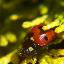

In [0]:
image.array_to_img(X_train[4])

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
input_shape = (64, 64, 3)
#Instantiate an empty model
model = Sequential([
Conv2D(64, (3, 3), input_shape=input_shape, padding='same', activation='relu'),
Conv2D(64, (3, 3), activation='relu', padding='same'),
MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
Conv2D(128, (3, 3), activation='relu', padding='same'),
Conv2D(128, (3, 3), activation='relu', padding='same',),
MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
Conv2D(256, (3, 3), activation='relu', padding='same',),
Conv2D(256, (3, 3), activation='relu', padding='same',),
Conv2D(256, (3, 3), activation='relu', padding='same',),
MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
Conv2D(512, (3, 3), activation='relu', padding='same',),
Conv2D(512, (3, 3), activation='relu', padding='same',),
Conv2D(512, (3, 3), activation='relu', padding='same',),
MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
Conv2D(512, (3, 3), activation='relu', padding='same',),
Conv2D(512, (3, 3), activation='relu', padding='same',),
Conv2D(512, (3, 3), activation='relu', padding='same',),
MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
Flatten(),
Dense(4096, activation='relu'),
Dense(4096, activation='relu'),
Dense(1, activation='softmax')
])
# model.summary()
# Compile the model
# model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=["accuracy"])
model.compile(loss='mean_squared_error', optimizer='adam')

In [0]:
len(X_train)
y_train.shape

(500,)

In [0]:
c = 'n01910747'
i = 22
img = image.load_img("tiny-imagenet-200/train/"+c+"/images/"+c+"_"+str(i)+".JPEG")
display(img)
#plt.imshow(img)
#plt.show()
# display(img)
img_arr = image.img_to_array(img)
new_img = image.array_to_img(img_arr)
display(new_img)
# img_arr = np.expand_dims(image.img_to_array(img), axis=0)[0]
print(img_arr.shape)

Image.fromarray(,'RGB')
x = img_arr.flatten()
print(len(x))
x = x.reshape(64,64,3)

Image.fromarray(x,'RGB')

image.array_to_img(img_arr)

    

In [0]:
import random
# import math

nums = 15
reps = 100
ans = []
scales = [i/100 for i in range(210)]
for scale in scales:
  ans += [(sum([np.prod([scale*random.random() for i in range(nums)]) for r in range(reps)])/reps)]


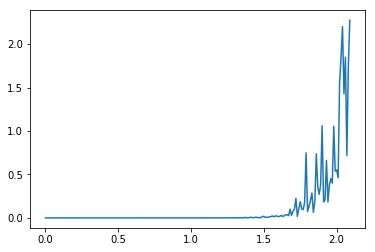

In [0]:
import matplotlib.pyplot as plt
plt.plot(scales,ans)
plt.show()